In [1]:
import pandas as pd

In [9]:
%matplotlib inline

In [2]:
train = pd.read_csv('bike/train (2).csv')
test = pd.read_csv('bike/test (2).csv')

In [3]:
train.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2489,2011-06-11 15:00:00,2,0,0,1,33.62,38.635,49,7.0015,142,232,374
731,2011-02-13 20:00:00,1,0,0,1,16.40,20.455,35,22.0028,15,32,47
5881,2012-02-01 06:00:00,1,0,1,3,16.40,20.455,54,11.0014,0,67,67
5022,2011-12-03 08:00:00,4,0,0,1,9.84,12.880,75,6.0032,1,62,63
9258,2012-09-09 03:00:00,3,0,0,1,22.14,25.760,73,15.0013,14,32,46


In [4]:
test.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4066,2012-04-21 06:00:00,2,0,0,1,20.50,24.24,82,15.0013
4743,2012-06-26 11:00:00,3,0,1,1,26.24,31.06,36,27.9993
1221,2011-05-28 21:00:00,2,0,0,1,27.06,31.06,74,19.9995
2541,2011-10-26 10:00:00,4,0,1,2,21.32,25.00,62,16.9979
4628,2012-06-21 16:00:00,3,0,1,1,36.90,40.91,35,8.9981


In [5]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
train.isnull().nunique()

datetime      1
season        1
holiday       1
workingday    1
weather       1
temp          1
atemp         1
humidity      1
windspeed     1
casual        1
registered    1
count         1
dtype: int64

In [7]:
train.weather.unique()

array([1, 2, 3, 4], dtype=int64)

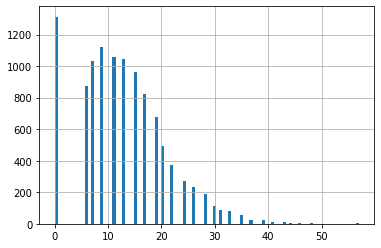

In [28]:
train['windspeed'].hist(bins=100)

In [11]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [12]:
train.windspeed

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10881    26.0027
10882    15.0013
10883    15.0013
10884     6.0032
10885     8.9981
Name: windspeed, Length: 10886, dtype: float64

## try1. 앞뒤에 있는 값의 평균으로 채워넣기

In [14]:
train['windspeed_v1']=train['windspeed']

In [16]:
train['windspeed_lag'] = train['windspeed_v1'].shift(1, fill_value=0)
train['windspeed_lead'] = train['windspeed_v1'].shift(-1, fill_value=0)

In [18]:
train['windspeed_mean_of_ll']=train['windspeed_lag']+train['windspeed_lead']/2

In [19]:
train.loc[train['windspeed_v1'] == 0, 'windspeed_v1'] = train.loc[train['windspeed_v1'] == 0, 'windspeed_mean_of_ll']

In [20]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,windspeed_v1,windspeed_lag,windspeed_lead,windspeed_mean_of_11,windspeed_mean_of_ll
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0000,0.0,0.0000,0.0000,0.0000
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0.0000,0.0,0.0000,0.0000,0.0000
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0.0000,0.0,0.0000,0.0000,0.0000
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0.0000,0.0,0.0000,0.0000,0.0000
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,3.0016,0.0,6.0032,3.0016,3.0016


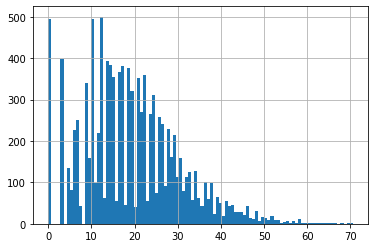

In [27]:
train['windspeed_mean_of_ll'].hist(bins=100)

## try2. 해당 날짜의 평균 풍속으로 채워넣기

In [22]:
train['windspeed_v2']=train['windspeed']

In [24]:
train['datetime_date']=pd.to_datetime(train['datetime']).dt.date

In [25]:
train['windspeed_mean_of_date'] = train.groupby('datetime_date')['windspeed'].transform(lambda x:x.mean())

In [26]:
train.loc[train['windspeed_v2'] == 0, 'windspeed_v2'] = train.loc[train['windspeed_v2'] == 0, 'windspeed_mean_of_date']

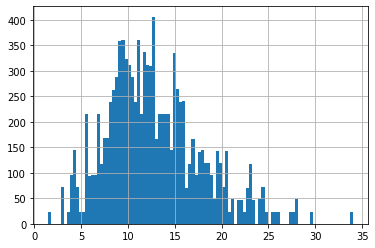

In [29]:
train['windspeed_mean_of_date'].hist(bins=100)